In [1]:
%%writefile C:/Users/asd_v/Mohey.py
print("I want this for now")
   
#for the See of the
# https://github.com/dunovank/jupyter-themes

from jupyterthemes import jtplot
jtplot.style(theme='grade3' , context='talk', fscale=1.4, spines=False, gridlines='--' , ticks=True,figsize=(6, 4.5) )
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
class Mohey():
    #my change dir
    def changedir(Dir):
        import os
        try:
            os.chdir(Dir)
        except:
            print("You are Here |"  , os.getcwd() ,  " |Plz check again Where u want to go")

    def visReset():
        jtplot.reset()
        
    def Nowarnings():
        import warnings
        warnings.filterwarnings(action='ignore')
        # import warnings
        # from sklearn.exceptions import DataConversionWarning
        # warnings.filterwarnings(action='ignore', category=DataConversionWarning)
class DataCamp():
    def X_y_Split(filename,shape):
        import numpy as np
        X_y = np.genfromtxt(filename , delimiter=',')
        X = X_y[:,1:shape]
        y = X_y[:,[shape]]
        return X,y

Overwriting C:/Users/asd_v/Mohey.py


In [2]:
%run C:/Users/asd_v/Mohey.py

I want this for now


In [3]:
Mohey.changedir('./data')
Mohey.visReset()
Mohey.Nowarnings()

In [4]:
import numpy as np

## Classification and Regression Trees

Classification and Regression Trees (CART) are a set of supervised learning models used for problems involving classification and regression. 

## Decision tree for classification
### Classification tree
#### Classif- cation-tree
   - Sequence of if-else questions about individual features.
   - Objective: infer class labels.
   - Able to capture non- linear relationships between features and labels.
   - Don 't require feature scaling (ex: Standardization,  . . )

#### Example
- Dataset: Wisconsin Breast Cancer Dataset from the UCI machine learning repository with 80% train and 20% test. 
- Predict (`diagnosis`) whether a tumor is malignant or benign based on two features: the mean radius of the tumor (`radius_mean`) and its mean number of concave points (`concave points_mean`).
    - The feature matrices are assigned to X_train and X_test, 
    - The arrays of labels are assigned to y_train and y_test where class 1 corresponds to a malignant tumor and class 0 corresponds to a benign tumor. 
    - To obtain reproducible results, we also defined a variable called SEED which is set to 1.

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error as MSE
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

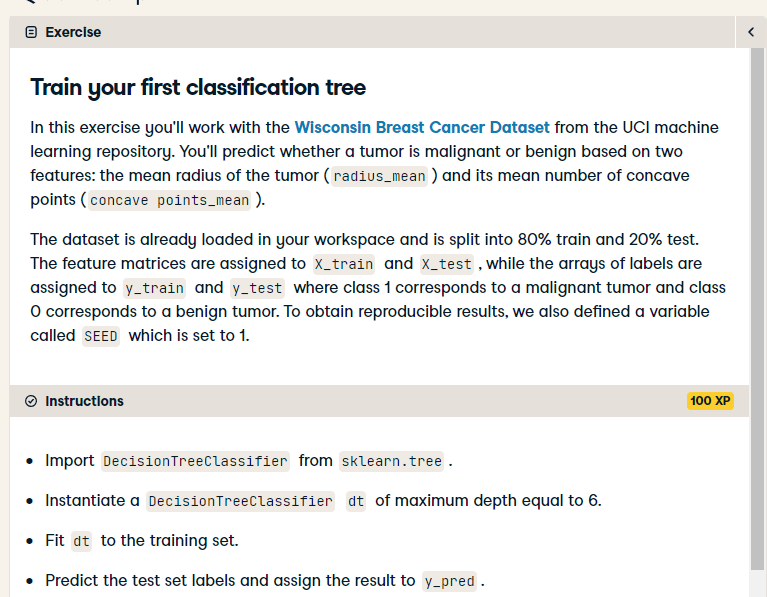

In [7]:

wbc = pd.read_csv('wbc.csv')
print(wbc.head())
X = wbc[['radius_mean', 'concave points_mean']]
y = wbc['diagnosis'].apply(lambda x: 1 if x == 'M' else 0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

In [8]:
# Import DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier
SEED=1
# Instantiate a DecisionTreeClassifier 'dt' with a maximum depth of 6
dt = DecisionTreeClassifier(max_depth=6,random_state=SEED)

# Fit dt to the training set
dt.fit(X_train, y_train)

# Predict test set labels
y_pred = dt.predict(X_test)
print(y_pred[0:5])

[0 1 0 1 0]


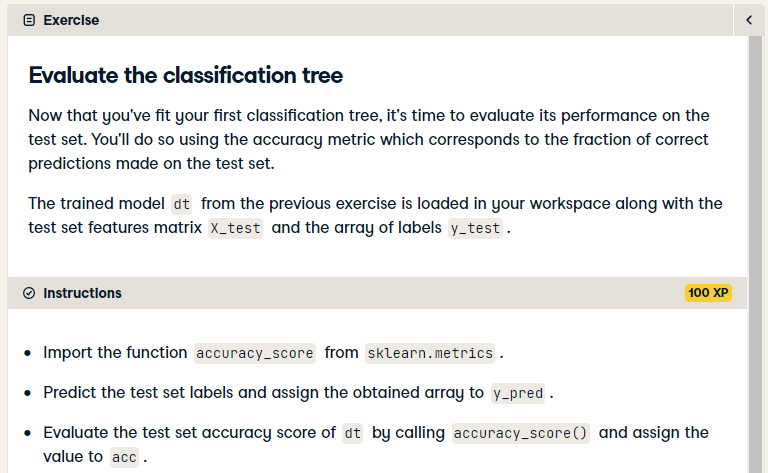

In [9]:
# Import accuracy_score
from sklearn.metrics import accuracy_score

# Predict test set labels
y_pred = dt.predict(X_test)

# Compute test set accuracy  
acc = accuracy_score(y_test, y_pred)
print("Test set accuracy: {:.2f}".format(acc))

Test set accuracy: 0.88


### Logistic regression vs classification tree

A classification tree divides the feature space into rectangular regions. In contrast, a linear model such as logistic regression produces only a single linear decision boundary dividing the feature space into two decision regions.

A given custom function called `plot_labeled_decision_regions()` is used to plot the decision regions of a list containing two trained classifiers. 



In [10]:
import mlxtend.plotting
def plot_labeled_decision_regions(X_test, y_test, clfs):
    
    for clf in clfs:

        mlxtend.plotting.plot_decision_regions(np.array(X_test), np.array(y_test), clf=clf, legend=2)
        
        plt.ylim((0,0.2))

        # Adding axes annotations
        plt.xlabel(X_test.columns[0])
        plt.ylabel(X_test.columns[1])
        plt.title(str(clf).split('(')[0])
        plt.show()

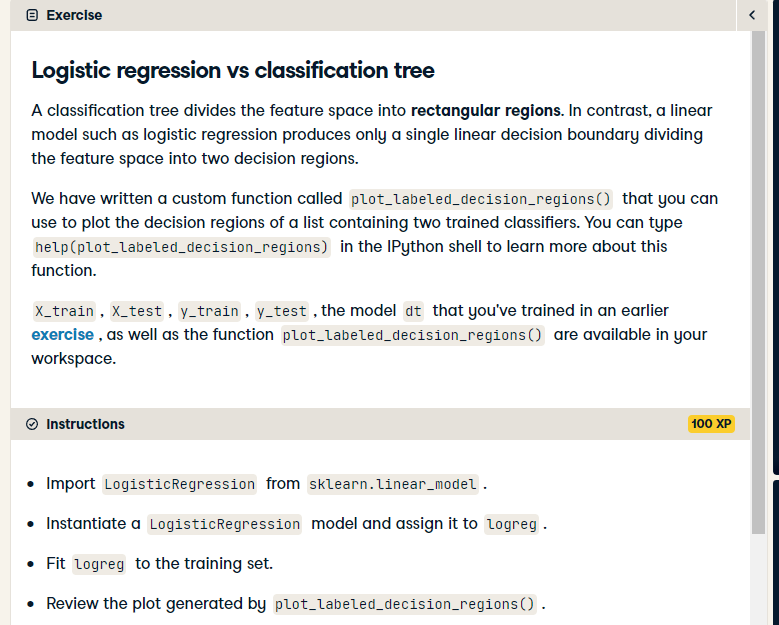

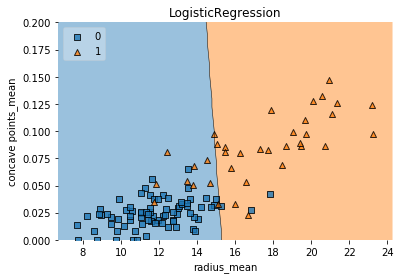

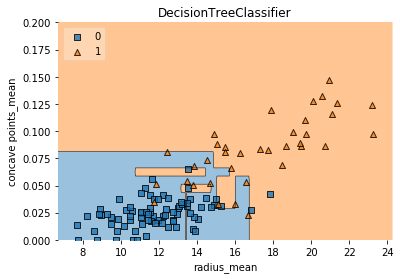

the decision boundary produced by logistic regression is linear
while the boundaries produced by the classification tree divide the feature space into rectangular regions


In [5]:
# Import LogisticRegression from sklearn.linear_model
#from sklearn.linear_model import LogisticRegression

# Instatiate logreg
logreg = LogisticRegression(solver = 'liblinear', random_state=1)

# Fit logreg to the training set
logreg.fit(X_train, y_train)

# Define a list called clfs containing the two classifiers logreg and dt
clfs = [logreg, dt]

# Review the decision regions of the two classifiers
plot_labeled_decision_regions(X_test, y_test, clfs)


Great work! Notice how the decision boundary produced by logistic regression is linear while the boundaries produced by the classification tree divide the feature space into rectangular regions.

## Classification tree Learning 
### Using entropy as a criterion

- With the Wisconsin Breast Cancer dataset using `entropy` as an information criterion, using all the 30 features in the dataset, which is split into 80% train and 20% test.


Growing a classification tree
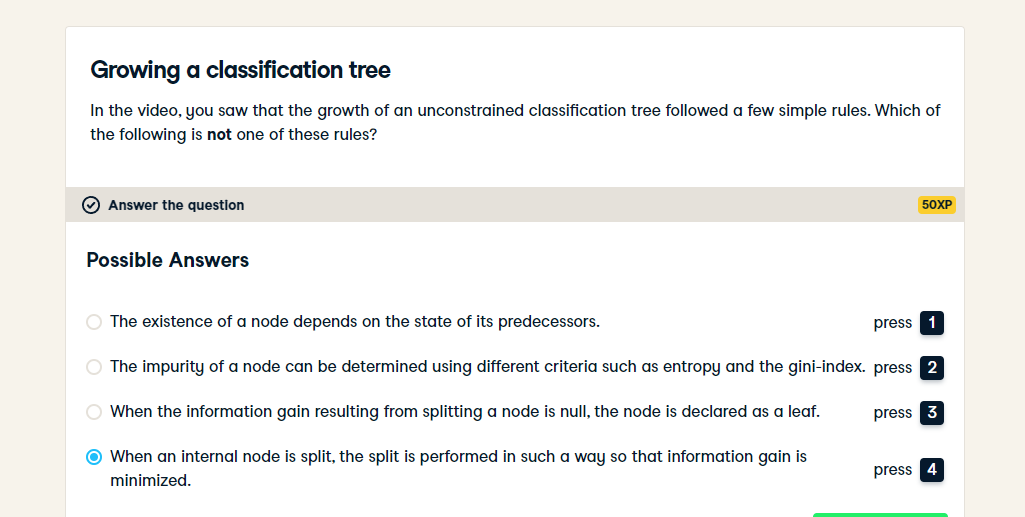

Absolutely so! It's quite the contrary! Actually, splitting an internal node always involves maximizing information gain!

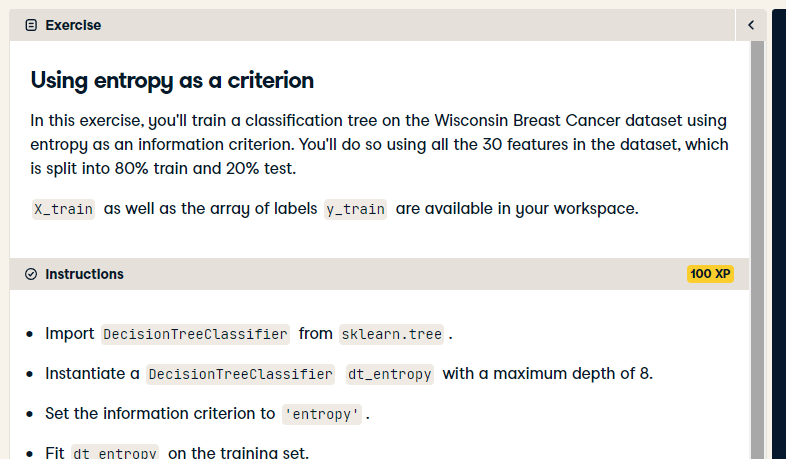

In [11]:
# Import DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier

# Instantiate dt_entropy, set 'entropy' as the information criterion
dt_entropy = DecisionTreeClassifier( max_depth=8, criterion='entropy', random_state=1)

# Fit dt_entropy to the training set
dt_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=1)

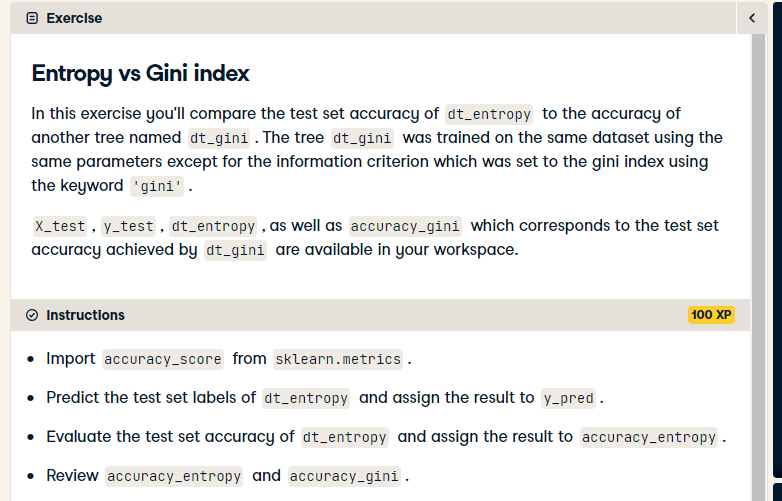

In [12]:
# Instantiate dt_gini, set 'gini' as the information criterion
dt_gini = DecisionTreeClassifier(max_depth = 8, criterion='gini', random_state=1)

# Fit dt_gini to the training set
dt_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, random_state=1)

In [8]:
# Import accuracy_score from sklearn.metrics
from sklearn.metrics import accuracy_score

# Use dt_entropy to predict test set labels
y_pred_entropy= dt_entropy.predict(X_test)
y_pred_gini=dt_gini.predict(X_test)

# Evaluate accuracy
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)
accuracy_gini = accuracy_score(y_test, y_pred_gini)

# Print accuracy_entropy
print('Accuracy achieved by using entropy: ', accuracy_entropy)

# Print accuracy_gini
print('Accuracy achieved by using the gini index: ', accuracy_gini)
print('gini is default to use when criterion not mentioned')

Accuracy achieved by using entropy:  0.8859649122807017
Accuracy achieved by using the gini index:  0.868421052631579


## Regression tree

- predict the mpg (miles per gallon) consumption of cars in the auto-mpg dataset using all the six available features.
- The dataset is split to 80% train and 20% test. 

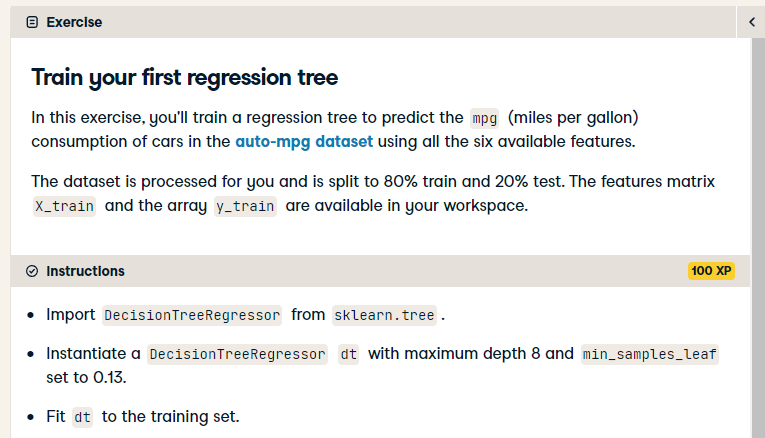

In [13]:
auto= pd.read_csv('auto.csv')
auto_origin = pd.get_dummies(auto.origin)
auto = pd.concat([auto, auto_origin], axis = 1).drop('origin', axis = 1)
auto.columns = ['mpg', 'displ', 'hp', 'weight', 'accel', 'size', 'origin_Asia', 'origin_Europe', 'origin_US']
auto.head()



,mpg,displ,hp,weight,accel,size,origin_Asia,origin_Europe,origin_US
0,18.0,250.0,88,3139,14.5,15.0,0,0,1
1,9.0,304.0,193,4732,18.5,20.0,0,0,1
2,36.1,91.0,60,1800,16.4,10.0,1,0,0
3,18.5,250.0,98,3525,19.0,15.0,0,0,1
4,34.3,97.0,78,2188,15.8,10.0,0,1,0


In [14]:
X = auto[['displ', 'hp', 'weight', 'accel', 'size', 'origin_Asia',
       'origin_Europe', 'origin_US']]
y = auto['mpg']

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=1)


In [15]:
# Import DecisionTreeRegressor from sklearn.tree
from sklearn.tree import DecisionTreeRegressor

# Instantiate dt
dt = DecisionTreeRegressor(max_depth=8,
             min_samples_leaf=0.13,
            random_state=3)

# Fit dt to the training set
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8, min_samples_leaf=0.13, random_state=3)

####  mean_squared_error of Decision Tree

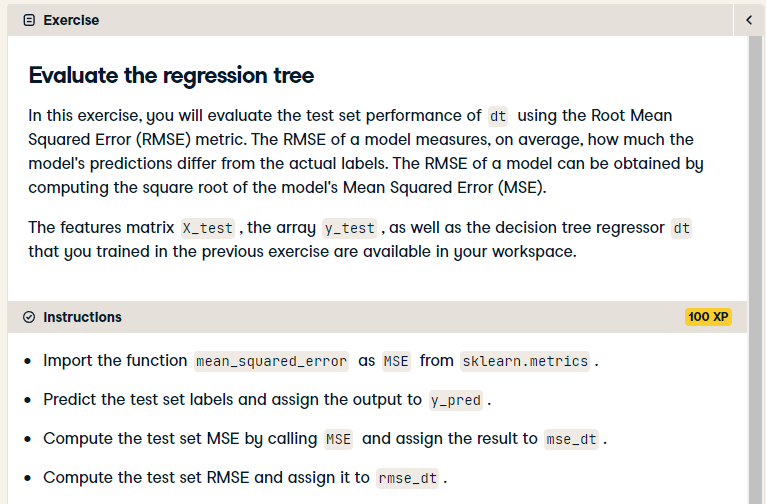

In [16]:
# Import mean_squared_error from sklearn.metrics as MSE
from sklearn.metrics import mean_squared_error as MSE

# Compute y_pred
y_pred = dt.predict(X_test)

# Compute mse_dt
mse_dt = MSE(y_test, y_pred)

# Compute rmse_dt
rmse_dt = mse_dt**(1/2)

# Print rmse_dt
print("Test set RMSE of dt: {:.2f}".format(rmse_dt))


Test set RMSE of dt: 4.27


In [17]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

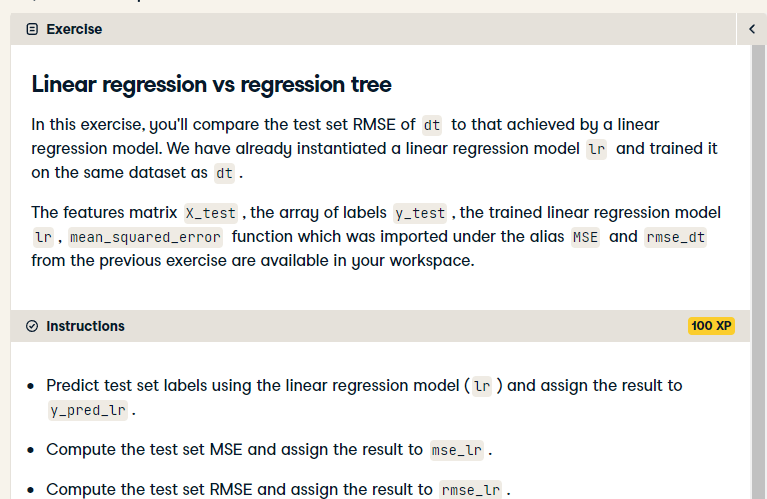

In [18]:
# Predict test set labels 
y_pred_lr = lr.predict(X_test)

# Compute mse_lr
mse_lr = MSE(y_test, y_pred_lr)

# Compute rmse_lr
rmse_lr = mse_lr**(1/2)

# Print rmse_lr
print('Linear Regression test set RMSE: {:.2f}'.format(rmse_lr))

# Print rmse_dt
print('Regression Tree test set RMSE: {:.2f}'.format(rmse_dt))

Linear Regression test set RMSE: 3.98
Regression Tree test set RMSE: 4.27


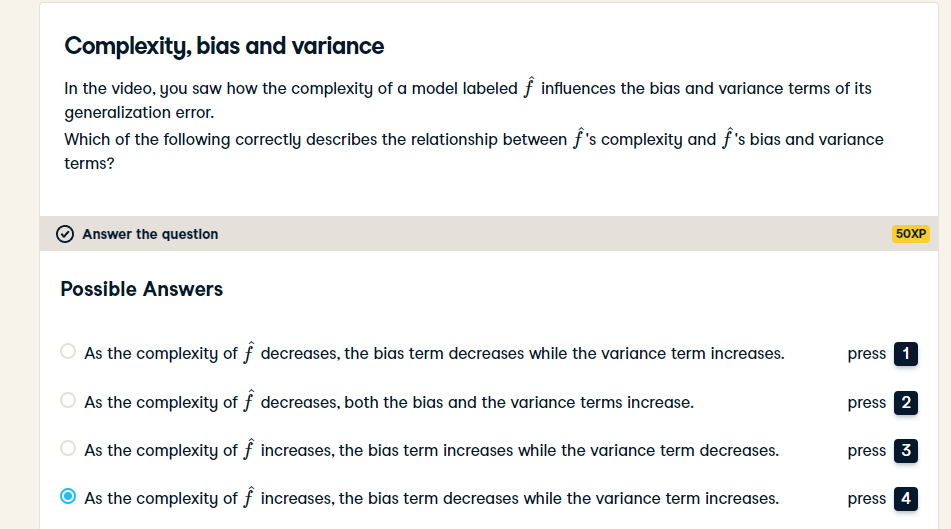

# The Bias-Variance Tradeoff 
### Generalization Error

In [19]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import BaggingClassifier

#### Diagnosing Bias and Variance Problems
- Diagnose the bias and variance problems of a regression tree to predict the `mpg` consumption of cars from the auto dataset using all available features.

In [20]:
auto= pd.read_csv('auto.csv')
auto_origin = pd.get_dummies(auto.origin)
auto = pd.concat([auto, auto_origin], axis = 1).drop('origin', axis = 1)
auto.columns = ['mpg', 'displ', 'hp', 'weight', 'accel', 'size', 'origin_Asia', 'origin_Europe', 'origin_US']

X = auto[['displ', 'hp', 'weight', 'accel', 'size', 'origin_Asia',
       'origin_Europe', 'origin_US']]
y = auto['mpg']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

#### Estimating the Generalization Error

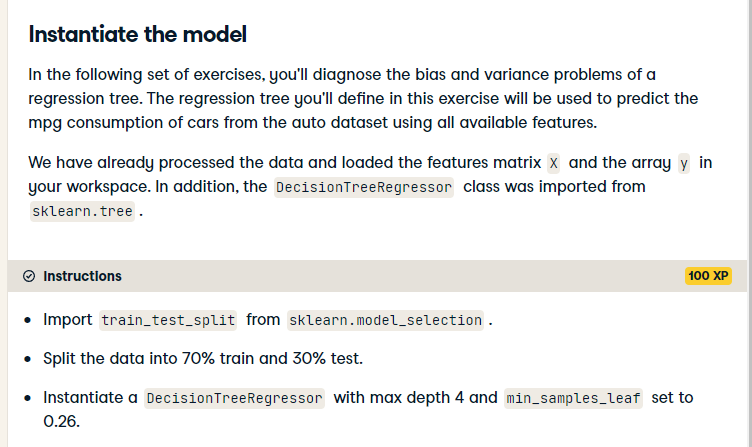

In [21]:


# Import train_test_split from sklearn.model_selection
from sklearn.model_selection import train_test_split

# Set SEED for reproducibility
SEED = 1

# Split the data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED)

# Instantiate a DecisionTreeRegressor dt
dt = DecisionTreeRegressor(max_depth=4, min_samples_leaf=0.26, random_state=SEED)

#### Evaluation with Cross- Validation

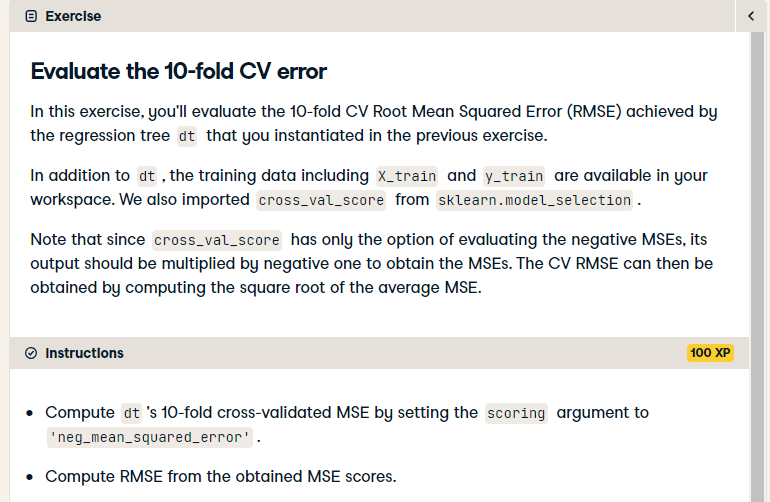

In [22]:
# valuate the list of MSE ontained by 10-fold CV
# Set n_jobs to -1 in order to exploit all CPU cores in computation
MSE_CV_scores = - cross_val_score(dt, X_train, y_train, 
                           cv= 10,
                           scoring='neg_mean_squared_error',
                           n_jobs = -1)

# Compute the 10-folds CV RMSE
RMSE_CV = (MSE_CV_scores.mean())**(1/2)

# Print RMSE_CV
print('CV RMSE: {:.2f}'.format(RMSE_CV))

CV RMSE: 5.14


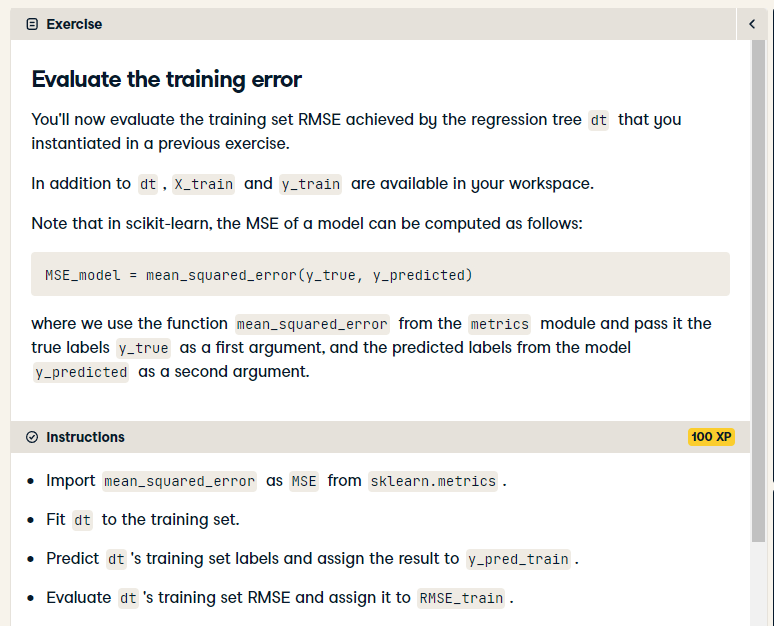

In [23]:
# Import mean_squared_error from sklearn.metrics as MSE
from sklearn.metrics import mean_squared_error as MSE

# Fit dt to the training set
dt.fit(X_train, y_train)

# Predict the labels of the training set
y_pred_train = dt.predict(X_train)

# Evaluate the training set RMSE of dt
RMSE_train = (MSE(y_train, y_pred_train))**(1/2)

# Print RMSE_train
print('Train RMSE: {:.2f}'.format(RMSE_train))


Train RMSE: 5.15


### Ensemble Learning

#### Limitations of CARTs
- Classication: can only produce orthogonal decision boundaries.
- Sensitive to small variations in the training set.
- High variance: unconstrained CARTs may overt the training set. <br>
    => Solution: ensemble learning.
#### Ensemble Learning
- Train different models on the same dataset.
- Let each model make its predictions.
- Meta-model: aggregates predictions ofindividual models.
- Final prediction: more robust and less prone to errors.
- Best results: models are skillful in different ways.

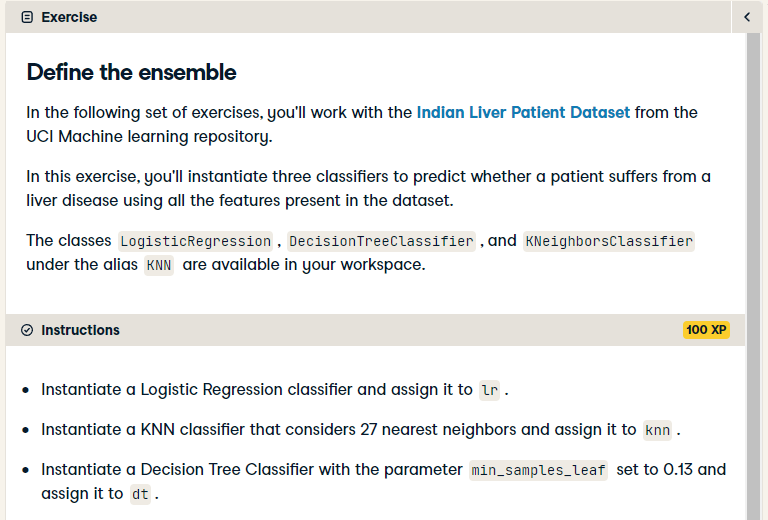

In [26]:

liver = pd.read_csv('indian_liver_patient/indian_liver_patient_preprocessed.csv', index_col = 0)
X = liver.drop('Liver_disease', axis = 1)
y = liver['Liver_disease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED)
liver.head()

,Age_std,Total_Bilirubin_std,Direct_Bilirubin_std,Alkaline_Phosphotase_std,Alamine_Aminotransferase_std,Aspartate_Aminotransferase_std,Total_Protiens_std,Albumin_std,Albumin_and_Globulin_Ratio_std,Is_male_std,Liver_disease
0,1.247403,-0.420320,-0.495414,-0.428870,-0.355832,-0.319111,0.293722,0.203446,-0.147390,0,1
1,1.062306,1.218936,1.423518,1.675083,-0.093573,-0.035962,0.939655,0.077462,-0.648461,1,1
2,1.062306,0.640375,0.926017,0.816243,-0.115428,-0.146459,0.478274,0.203446,-0.178707,1,1
3,0.815511,-0.372106,-0.388807,-0.449416,-0.366760,-0.312205,0.293722,0.329431,0.165780,1,1
4,1.679294,0.093956,0.179766,-0.395996,-0.295731,-0.177537,0.755102,-0.930414,-1.713237,1,1


In [28]:
# Set seed for reproducibility
SEED=1

# Instantiate lr
lr = LogisticRegression(random_state=SEED)

# Instantiate knn
knn = KNN(n_neighbors=27)

# Instantiate dt
dt = DecisionTreeClassifier(min_samples_leaf=0.13, random_state=SEED)

# Define the list classifiers
classifiers = [('Logistic Regression', lr), ('K Nearest Neighbours', knn), ('Classification Tree', dt)]

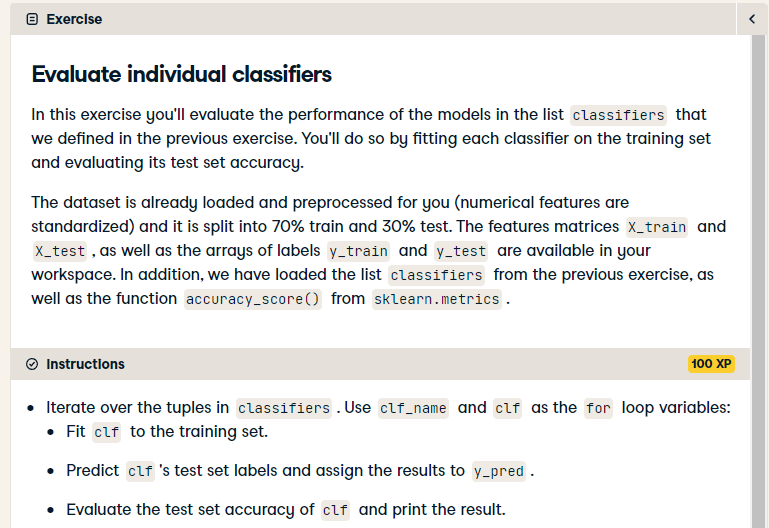

In [29]:
# Iterate over the pre-defined list of classifiers
for clf_name, clf in classifiers:    
 
    # Fit clf to the training set
    clf.fit(X_train, y_train)    
   
    # Predict y_pred
    y_pred =  clf.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred) 
   
    # Evaluate clf's accuracy on the test set
   
    print('{:s} : {:.3f}'.format(clf_name, accuracy))
    

Logistic Regression : 0.759
K Nearest Neighbours : 0.701
Classification Tree : 0.730


#### Better performance with a Voting Classifier

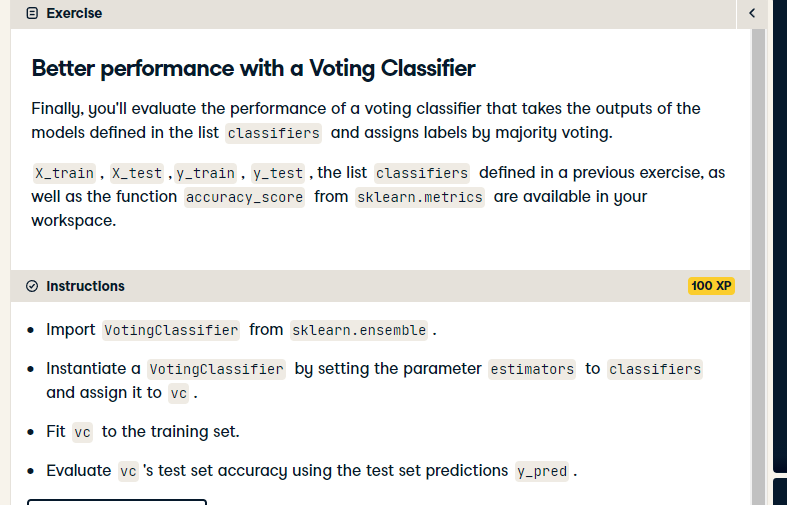

In [30]:
# Import VotingClassifier from sklearn.ensemble
from sklearn.ensemble import VotingClassifier

# Instantiate a VotingClassifier vc
vc = VotingClassifier(estimators=classifiers)     

# Fit vc to the training set
vc.fit(X_train, y_train)   

# Evaluate the test set predictions
y_pred = vc.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('Voting Classifier: {:.3f}'.format(accuracy))


Voting Classifier: 0.770


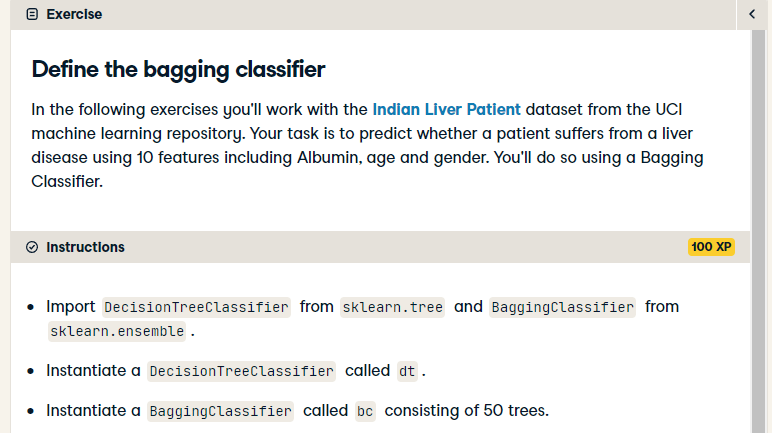

In [31]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Import BaggingClassifier
from sklearn.ensemble import BaggingClassifier

# Instantiate dt
dt = DecisionTreeClassifier(random_state=1)

# Instantiate bc
bc = BaggingClassifier(base_estimator=dt, n_estimators=50, random_state=1)

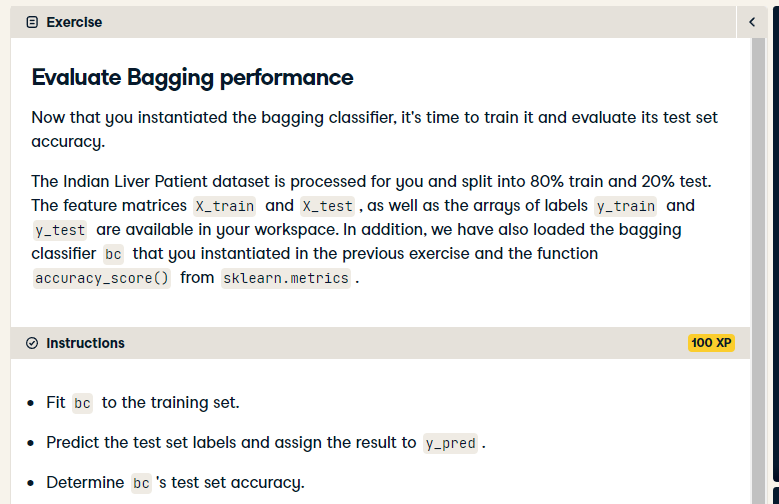

In [33]:
# Fit bc to the training set
bc.fit(X_train, y_train)

# Predict test set labels
y_pred = bc.predict(X_test)

# Evaluate acc_test
acc_test = accuracy_score(y_test, y_pred)
print('Test set accuracy of bc: {:.2f}'.format(acc_test)) 

Test set accuracy of bc: 0.70


In [34]:
# Import accuracy_score
from sklearn.metrics import accuracy_score


# Instantiate a DecisionTreeClassifier 'dt' with a maximum depth of 6
dt = DecisionTreeClassifier(max_depth=6,random_state=SEED)

# Fit dt to the training set
dt.fit(X_train, y_train)

# Predict test set labels
y_pred = dt.predict(X_test)
print(y_pred[0:5])

# Predict test set labels
y_pred = dt.predict(X_test)

# Compute test set accuracy  
acc = accuracy_score(y_test, y_pred)
print("Test set accuracy: {:.2f}".format(acc))

[1 1 0 1 1]
Test set accuracy: 0.66


# Bagging and Random Forests

### Bagging
- Bagging is an ensemble method involving training the same algorithm many times using different subsets sampled from the training data.
- Bagging: Bootstrap Aggregation.
- Uses a technique known as the bootstrap.
- Reduces variance of individual models in the ensemble
- Can be used to create a tree ensemble


### Bagging: Classification & Regression
- Classification:
    - Aggregates predictions by majority voting.
    - `BaggingClassifier`  in **scikit- learn**
- Regression:
    - Aggregates predictions through averaging.
    - `BaggingRegressor`  in **scikit- learn**

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier as KNN

from sklearn.metrics import accuracy_score
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingClassifier

SEED =1


### Note
#### Bagging
- some instances may be sampled several times for one model,
- other instances may not be sampled at all.

#### Out Of Bag (OOB) instances
- On average,  for each model,  63% of the training instances are sampled.
- The remaining 37% constitute the OOB instances.


#### Ex: Define the bagging classifier with the Indian Liver Patient dataset
- To predict whether a patient suffers from a liver disease using 10 features including Albumin, age and gender.



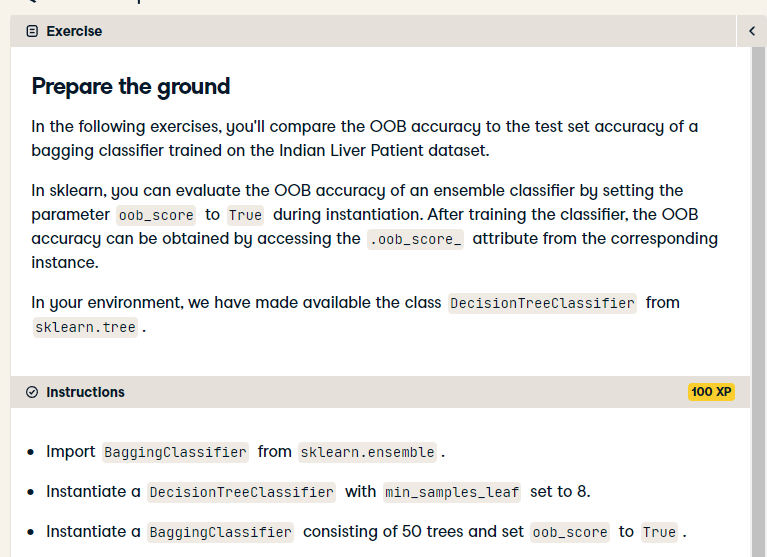

In [36]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Import BaggingClassifier
from sklearn.ensemble import BaggingClassifier

# Instantiate dt
dt = DecisionTreeClassifier(min_samples_leaf=8, random_state=1)

# Instantiate bc
bc = BaggingClassifier(base_estimator=dt, 
            n_estimators=50,
            oob_score=True,
            random_state=1)

In [37]:
liver = pd.read_csv('indian_liver_patient/indian_liver_patient_preprocessed.csv', index_col = 0)
X = liver.drop('Liver_disease', axis = 1)
y = liver['Liver_disease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED)
liver.head()

,Age_std,Total_Bilirubin_std,Direct_Bilirubin_std,Alkaline_Phosphotase_std,Alamine_Aminotransferase_std,Aspartate_Aminotransferase_std,Total_Protiens_std,Albumin_std,Albumin_and_Globulin_Ratio_std,Is_male_std,Liver_disease
0,1.247403,-0.420320,-0.495414,-0.428870,-0.355832,-0.319111,0.293722,0.203446,-0.147390,0,1
1,1.062306,1.218936,1.423518,1.675083,-0.093573,-0.035962,0.939655,0.077462,-0.648461,1,1
2,1.062306,0.640375,0.926017,0.816243,-0.115428,-0.146459,0.478274,0.203446,-0.178707,1,1
3,0.815511,-0.372106,-0.388807,-0.449416,-0.366760,-0.312205,0.293722,0.329431,0.165780,1,1
4,1.679294,0.093956,0.179766,-0.395996,-0.295731,-0.177537,0.755102,-0.930414,-1.713237,1,1


In [38]:
# Instantiate dt
dt = DecisionTreeClassifier(random_state=1)

# Instantiate bc
bc = BaggingClassifier(base_estimator=dt, n_estimators=50, random_state=1)

# Fit bc to the training set
bc.fit(X_train, y_train)

# Predict test set labels
y_pred = bc.predict(X_test)

# Evaluate acc_test
acc_test = accuracy_score(y_test, y_pred)
print('Test set accuracy of bc: {:.2f}'.format(acc_test)) 

Test set accuracy of bc: 0.70


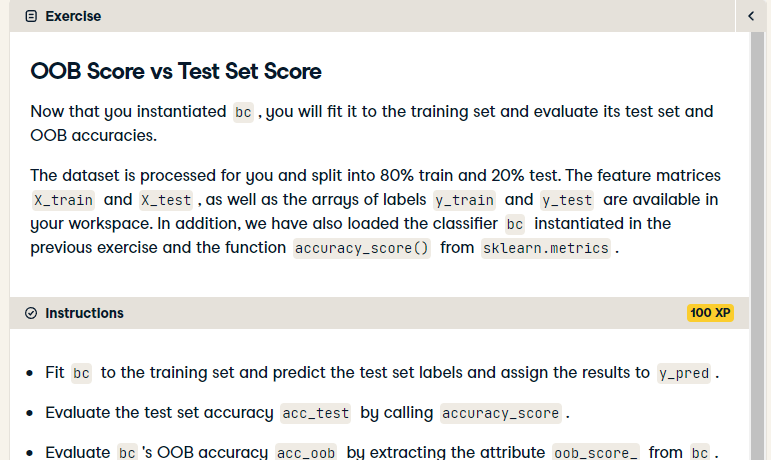

In [7]:
# Instantiate dt
dt = DecisionTreeClassifier(min_samples_leaf=8, random_state=1)

# Instantiate bc
bc = BaggingClassifier(base_estimator=dt, 
            n_estimators=50,
            oob_score=True,
            random_state=1)
# Fit bc to the training set 
bc.fit(X_train, y_train)

# Predict test set labels
y_pred = bc.predict(X_test)

# Evaluate test set accuracy
acc_test = accuracy_score(y_test, y_pred)

# Evaluate OOB accuracy
acc_oob = bc.oob_score_

# Print acc_test and acc_oob
print('Test set accuracy: {:.2f}, OOB accuracy: {:.2f}'.format(acc_test, acc_oob))

Test set accuracy: 0.72, OOB accuracy: 0.69


### Random Forest
Random forests algorithm can lead to further ensemble diversity through randomization at the level of each split in the trees forming the ensemble.
#### Bagging
- Base estimator: Decision Tree,  Logistic Regression,  Neural Net,  . . .
- Each estimator is trained on a distinct bootstrap sample of the training set
- Estimators use all features for training and prediction

#### Random Forests
- Base estimator: Decision Tree
- Each estimator is trained on a different bootstrap sample having the same size as the training set
- RF introduces further randomization in the training of individual trees
- d features are sampled at each node without replacement ```( d < total number  of featur es  )```
#### Random Forests: Classification & Regression
- Classification:
    * Aggregates predictions by majority voting
    * `RandomForestClassifier`  in `sklearn.ensemble`
- Regression:
    * Aggregates predictions through averaging
    * `RandomForestRegressor`  in `sklearn.ensemble`

In [39]:

bike = pd.read_csv('bikes.csv')
X = bike[['hr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'instant',
       'mnth', 'yr', 'Clear to partly cloudy', 'Light Precipitation', 'Misty']]
y = bike['cnt']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)
bike.head()

,hr,holiday,workingday,temp,hum,windspeed,cnt,instant,mnth,yr,Clear to partly cloudy,Light Precipitation,Misty
0,0,0,0,0.76,0.66,0.0000,149,13004,7,1,1,0,0
1,1,0,0,0.74,0.70,0.1343,93,13005,7,1,1,0,0
2,2,0,0,0.72,0.74,0.0896,90,13006,7,1,1,0,0
3,3,0,0,0.72,0.84,0.1343,33,13007,7,1,1,0,0
4,4,0,0,0.70,0.79,0.1940,4,13008,7,1,1,0,0


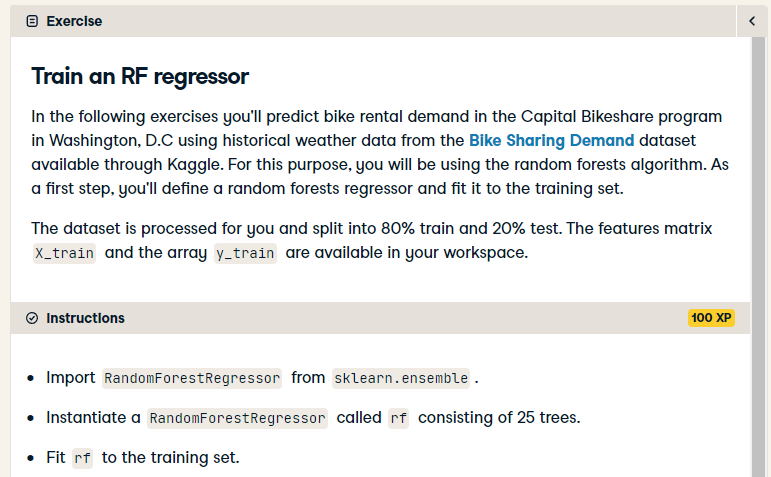

In [41]:
# Import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

# Instantiate rf
rf = RandomForestRegressor(n_estimators=25,
            random_state=2)
            
# Fit rf to the training set    
rf.fit(X_train, y_train) 

RandomForestRegressor(n_estimators=25, random_state=2)

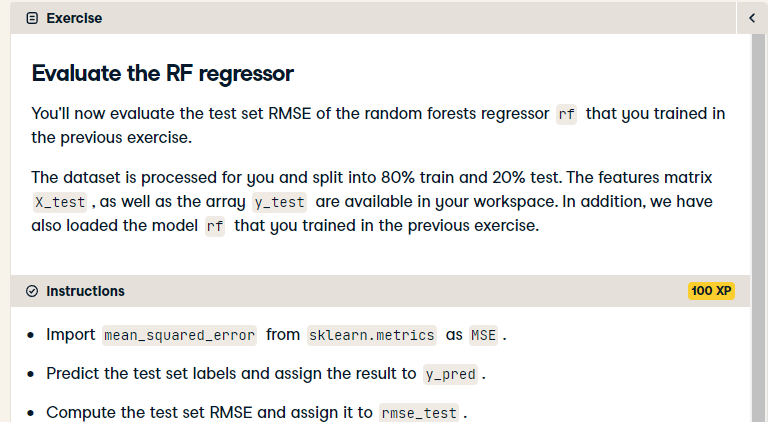

In [42]:
# Import mean_squared_error as MSE
from sklearn.metrics import mean_squared_error as MSE

# Predict the test set labels
y_pred = rf.predict(X_test)

# Evaluate the test set RMSE
rmse_test = MSE(y_test, y_pred)**(1/2)

# Print rmse_test
print('Test set RMSE of rf: {:.2f}'.format(rmse_test))

Test set RMSE of rf: 51.84


#### Feature Importance
- Tree-based methods: enable measuring the importance of each feature in prediction.
- In  sklearn :
    - how much the tree nodes use a particular feature (weighted average) to reduce impurity accessed using the attribute  `feature_importance_`

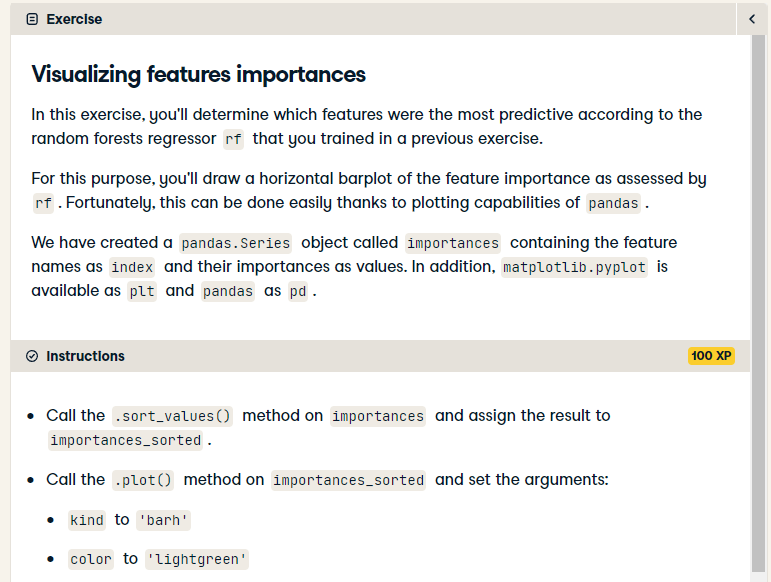

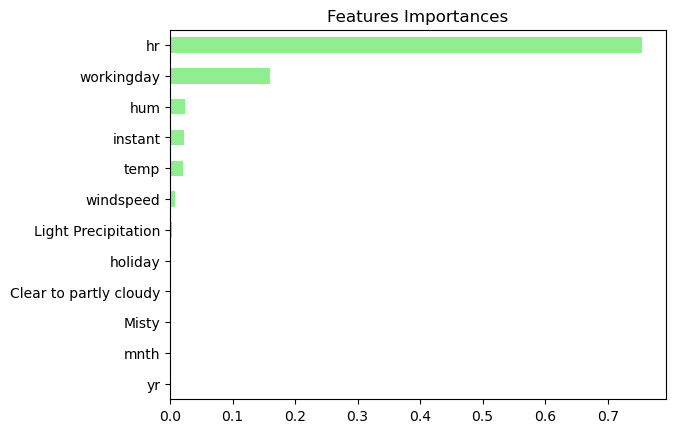

In [44]:
# Create a pd.Series of features importances
importances = pd.Series(data=rf.feature_importances_,
                        index= X_train.columns)

# Sort importances
importances_sorted = importances.sort_values()

# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(color='lightgreen', kind='barh')
plt.title('Features Importances')
plt.show()

# Boosting
Boosting refers to an ensemble method in which several models are trained sequentially with each model learning from the errors of its predecessors. 
### Boosting
- Boosting: Ensemble method combining several weak learners to form a strong learner .
- Weak learner: Model doing slightly better than random guessing.
- Example of weak learner: Decision stump (CART whose maximum depth is 1).
- Train an ensemble of predictors sequentially .
- Each predictor tries to correct its predecessor .
- Most popular boosting methods:
    - AdaBoost,
    - Gradient Boosting.

### AdaBoost
- Stands for Adaptive Boosting.
- Each predictor pays more attention to the instances wrongly predicted by its predecessor .
- Achieved by changing the weights of training instances.
- Each predictor is assigned a coeficient α.
- α depends on the predictor's training error .
-AdaBoost: Prediction
    - Classification:
        - Weighted majority voting.
        - In sklearn:  `AdaBoostClassifier` .
    - Regression:
        - Weighted average.
        - In sklearn:  `AdaBoostRegressor`.
- Define the AdaBoost classifier
    - Dataset: the Indian Liver Patient dataset 
    - Task: 
        - Predict whether a patient suffers from a liver disease using 10 features including Albumin, age and gender. 
        - with AdaBoost ensemble to perform the classification task. 
        - using the ROC AUC score as a metric instead of accuracy.
    - Doing:
        - Dataset
        - Instantiate dt,ada
        - Predict the probabilities of obtaining the positive class in the test set.
        - Extract these probabilities by slicing all the values in the second column
        - Evaluate ada's ROC AUC score, a binary classifier can be determined using the `roc_auc_score()`

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier as KNN

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error as MSE

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingRegressor

SEED =1




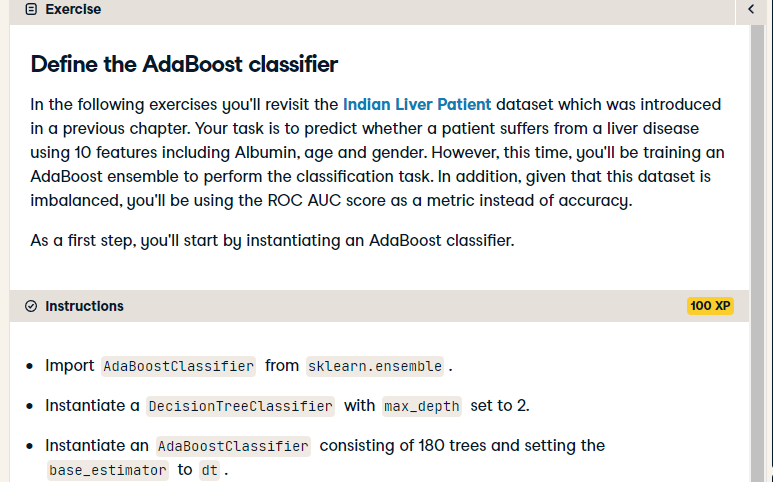

In [45]:
# Dataset
liver = pd.read_csv('indian_liver_patient/indian_liver_patient_preprocessed.csv', index_col = 0)
X = liver.drop('Liver_disease', axis = 1)
y = liver['Liver_disease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED)


# Split data into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
stratify=y,
random_state=SEED)

liver.head()

,Age_std,Total_Bilirubin_std,Direct_Bilirubin_std,Alkaline_Phosphotase_std,Alamine_Aminotransferase_std,Aspartate_Aminotransferase_std,Total_Protiens_std,Albumin_std,Albumin_and_Globulin_Ratio_std,Is_male_std,Liver_disease
0,1.247403,-0.420320,-0.495414,-0.428870,-0.355832,-0.319111,0.293722,0.203446,-0.147390,0,1
1,1.062306,1.218936,1.423518,1.675083,-0.093573,-0.035962,0.939655,0.077462,-0.648461,1,1
2,1.062306,0.640375,0.926017,0.816243,-0.115428,-0.146459,0.478274,0.203446,-0.178707,1,1
3,0.815511,-0.372106,-0.388807,-0.449416,-0.366760,-0.312205,0.293722,0.329431,0.165780,1,1
4,1.679294,0.093956,0.179766,-0.395996,-0.295731,-0.177537,0.755102,-0.930414,-1.713237,1,1


In [47]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Import AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier

# Instantiate dt
dt = DecisionTreeClassifier(max_depth=2, random_state=1)

# Instantiate ada
ada = AdaBoostClassifier(base_estimator=dt, n_estimators=180, random_state=1)

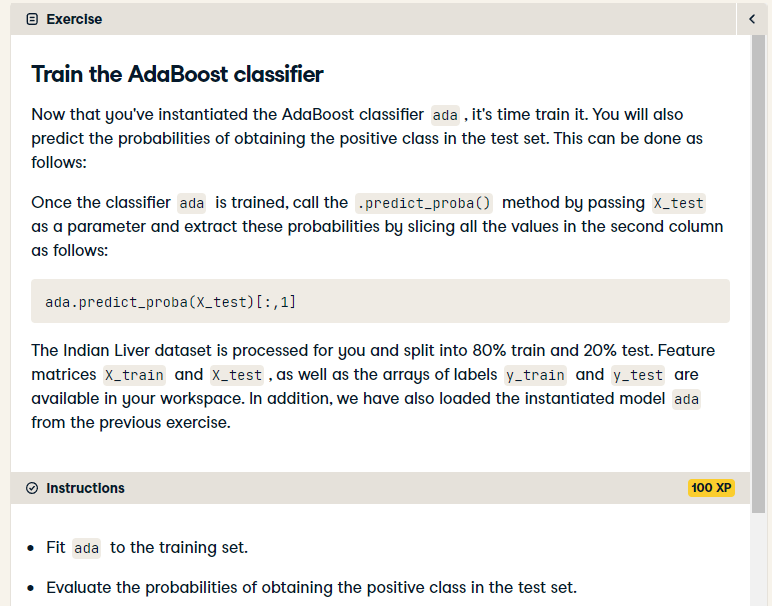

In [48]:


# Fit ada to the training set
ada.fit(X_train, y_train)

# Compute the probabilities of obtaining the positive class
y_pred_proba = ada.predict_proba(X_test)[:,1]

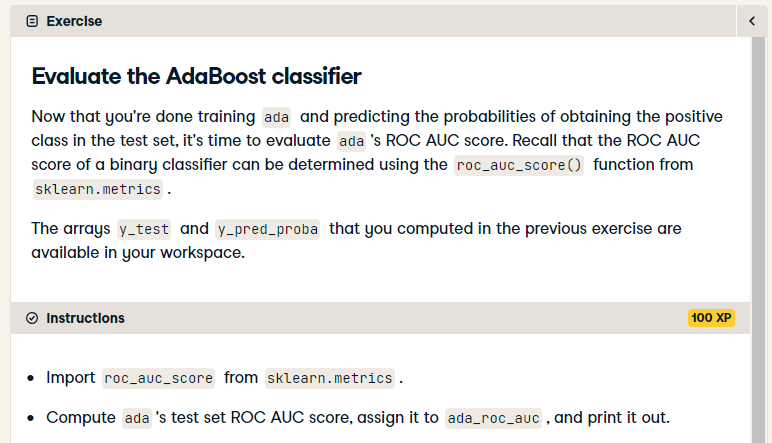

In [49]:
# Import roc_auc_score
from sklearn.metrics import roc_auc_score

# Evaluate test-set roc_auc_score
ada_roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print roc_auc_score
print('ROC AUC score: {:.2f}'.format(ada_roc_auc))

ROC AUC score: 0.69


### Gradient Boosting
#### Gradient Boosted Trees
- Sequential correction of predecessor's errors.
- Does not tweak the weights of training instances.
- Fit each predictor is trained using its predecessor's residual errors as labels.
- Gradient Boosted T rees: a CART is used as a base learner
#### Gradient Boosted T rees: Prediction
- Regression:
    - $y_{pred} = y + ηr_1 + ... + ηr_N$
    - In sklearn:  GradientBoostingRegressor .
- Classi×cation:
    - In sklearn:  GradientBoostingClassifier .
#### Example
- Dataset:  Bike Sharing Demand
- Tasks: 
    - to predict the bike rental demand using historical weather data from the Capital Bikeshare program in Washington, D.C.. 
    - using a gradient boosting regressor.
- Doing:
    - Dataset
    - Instantiate a gradient boosting regressor 
    - Train the dataset
    - Evaluate the GB regressor

In [50]:
#Dataset
bike = pd.read_csv('bikes.csv')

X = bike[['hr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'instant',
       'mnth', 'yr', 'Clear to partly cloudy', 'Light Precipitation', 'Misty']]
y = bike['cnt']

# Split data into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#### GB regressor

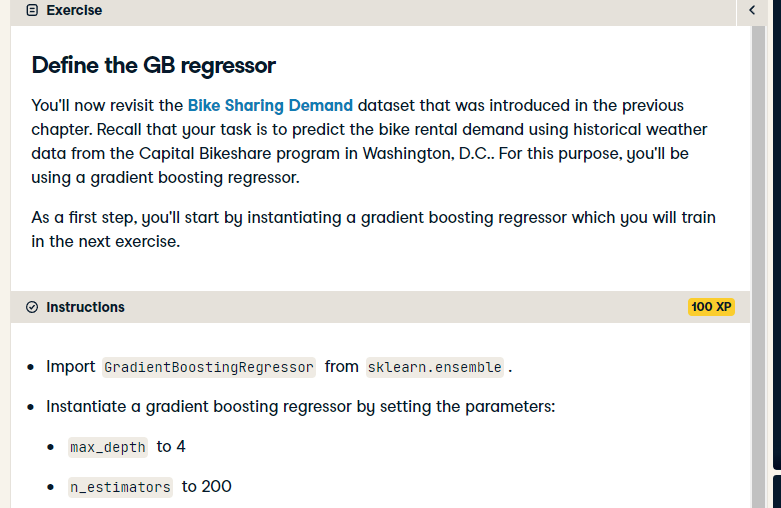

In [52]:
# Import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Instantiate gb
gb = GradientBoostingRegressor(max_depth=4, 
            n_estimators=200,
            random_state=2)

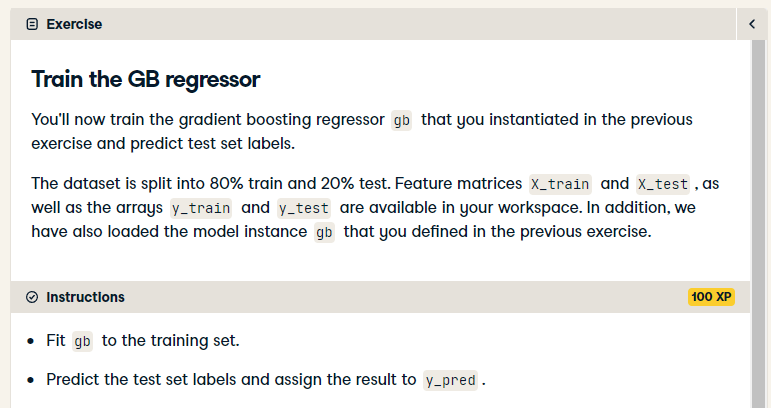

In [53]:
# Fit gb to the training set
gb.fit(X_train, y_train)

# Predict test set labels
y_pred = gb.predict(X_test)


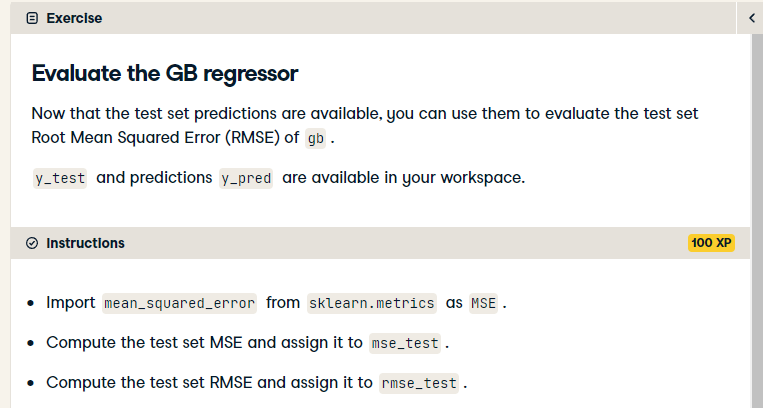

In [54]:
# Import mean_squared_error as MSE
from sklearn.metrics import mean_squared_error as MSE


# Compute MSE
mse_test = MSE(y_test, y_pred)

# Compute RMSE
rmse_test = mse_test**(1/2)

# Print RMSE
print('Test set RMSE of gb: {:.3f}'.format(rmse_test))

Test set RMSE of gb: 53.197


### Stochastic Gradient Boosting (SGB)

#### Gradient Boosting
- GB involves an exhaustive search procedure.
- Each CART is trained to **find the best split points and features**.
- May lead to CARTs using the same split points and maybe the same features.

#### Stochastic Gradient Boosting
- Each tree is trained on **a random subset of rows** of the training data.
- The sampled instances (40%-80% of the training set) are sampled without replacement.
- Features are sampled (without replacement) when choosing split points.
- Result: further ensemble diversity .
- Effect: adding further variance to the ensemble of trees.

#### Example: Regression with SGB
- Dataset Bike Sharing Demand. 
- Task: solve this bike count regression problem using stochastic gradient boosting.
- Doing
    - Dataset
    - Train the SGB regressor
    - Predict the test set labels.
    - Evaluate test set.

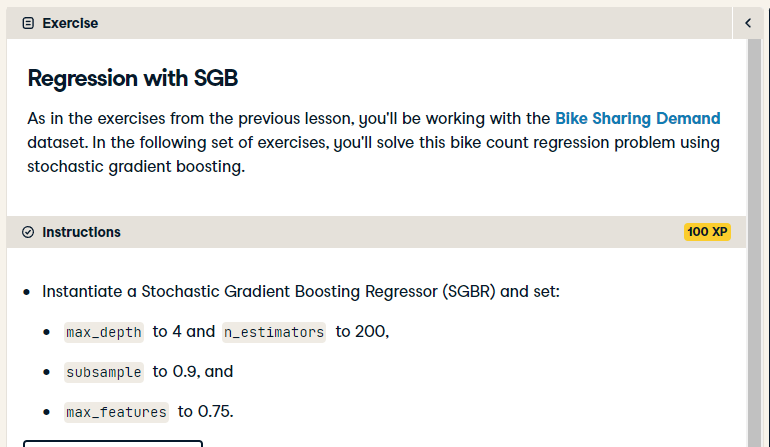

In [55]:
# Import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Instantiate sgbr
sgbr = GradientBoostingRegressor(max_depth=4, 
            subsample=0.9,
            max_features=0.75,
            n_estimators=200,                                
            random_state=2)

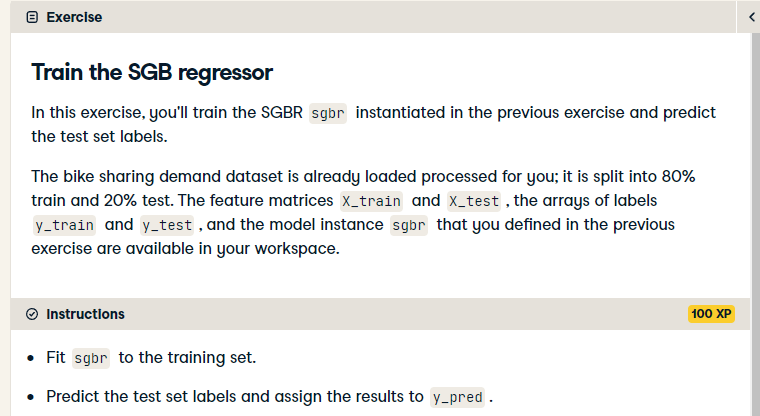

In [56]:
# Fit sgbr to the training set
sgbr.fit(X_train, y_train)

# Predict test set labels
y_pred = sgbr.predict(X_test)


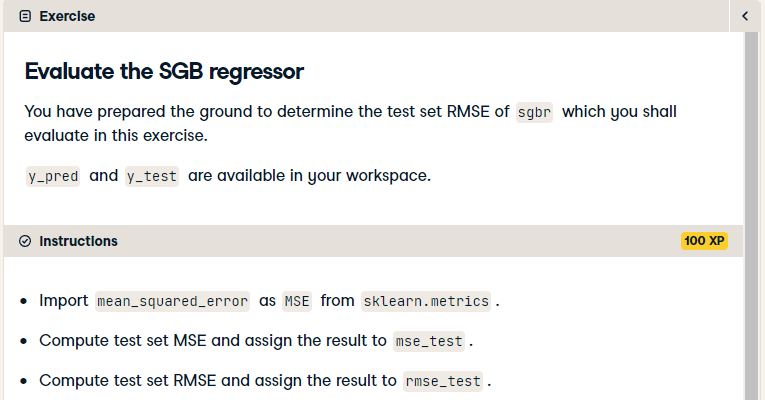

In [57]:
rmse_test_gb = rmse_test

In [58]:
# Import mean_squared_error as MSE
from sklearn.metrics import mean_squared_error as MSE

# Compute test set MSE
mse_test = MSE(y_test, y_pred)

# Compute test set RMSE
rmse_test_sgb = mse_test**(1/2)

# Print rmse_test
print('Test set RMSE of sgbr: {:.3f}'.format(rmse_test_sgb))
print('Test set RMSE of gb: {:.3f}'.format(rmse_test_gb))

print('\nThe stochastic gradient boosting regressor achieves a lower test set RMSE\
\nthan the gradient boosting regressor, which was {:.3f}'.format(rmse_test_gb) )

Test set RMSE of sgbr: 53.041
Test set RMSE of gb: 53.197

The stochastic gradient boosting regressor achieves a lower test set RMSE
than the gradient boosting regressor, which was 53.197


# Model Tuning 
- The hyperparameters of a machine learning model are parameters that are not learned from data. They should be set prior to fitting the model to the training set to tune the hyperparameters of a tree-based model using grid search cross validation.

### Tuning a CART's hyperparameters
#### Hyperparameters
Machine learning model:
- parameters: learned from data
    - CART example: `split-point` of a node,  `split- feature` of a node,  ...
- hyperparameters: not learned from data,  set prior to training
    - CART example:  `max_depth`,   `min_samples_leaf`,  `splitting criterion`...
    
#### What is hyperparameter tuning?
- Problem: search for a set of optimal hyperparameters for a learning algorithm.
- Solution: find a set of optimal hyperparameters that results in an optimal model.
- Optimal model: yields an optimal score.
- Score: in `sklearn` defaults to accuracy (classification) and R  (regression).
- Cross validation is used to estimate the generalization performance.

#### Why tune hyperparameters?
- In  `sklearn`,  a model's default hyperparameters are not optimal for all problems.
- Hyperparameters should be tuned to obtain the best model performance.

#### Grid search cross validation
- Manually set a grid of discrete hyperparameter values.
    - $max\_depth  = {2, 3, 4},$
    - $min\_samples\_leaf  = {0. 05,  0. 1}$
- Set a metric for scoring model performance.
    - hyperparameter space = ${ (2, 0. 05) ,  (2, 0. 1) ,  (3, 0. 05),  . . .  }$
- Search exhaustively through the grid.
- For each set of hyperparameters,  evaluate each model's CV score.
    - CV scores = { $score_{(2, 0. 05)}$  ,  . . .  }
- The optimal hyperparameters are those of the model achieving the best CV score.
    - optimal hyperparameters = set of hyperparameters corresponding to the best CV score

#### Example: 
Hyperparameter of `DecisionTreeClassifier` 
```
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')
          ```
=> `mean_features` not a Hyperparameter of `DecisionTreeClassifier`
#### Doing
- Inspecting the hyperparameters of a CART in `sklearn`
- Extracting the best hyperparameters
    - Set the tree's hyperparameter grid
    - Define params_dt
    - Evaluate the optimal tree
    - Compute the test set ROC AUC score.
- Extracting the best estimator

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier as KNN

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error as MSE

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingRegressor

SEED =1

In [59]:
#Dataset
liver = pd.read_csv('indian_liver_patient/indian_liver_patient_preprocessed.csv', index_col = 0)
X = liver.drop('Liver_disease', axis = 1)
y = liver['Liver_disease']

dt = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, random_state=1,
            splitter='best')


#split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)


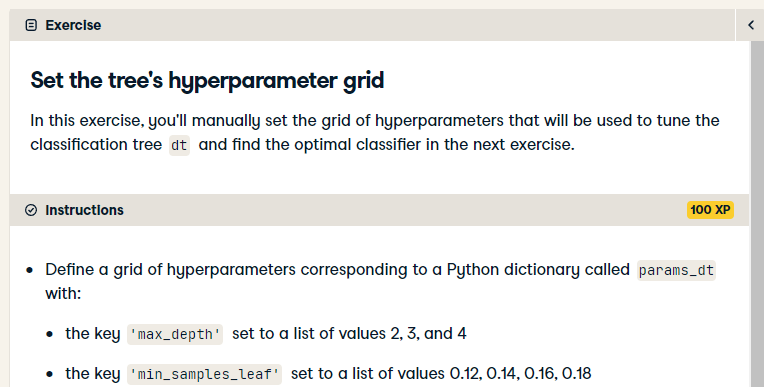

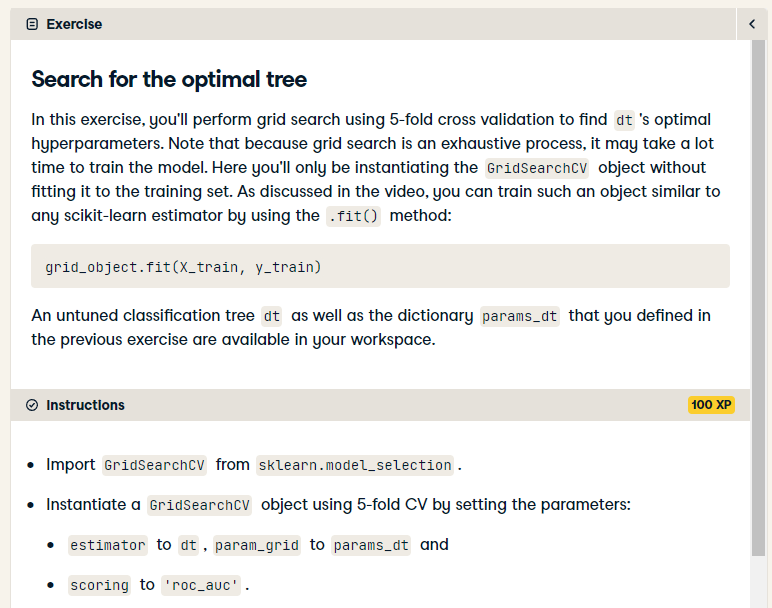

In [60]:
#set the tree's hyperparameter grid
# Define params_dt
params_dt = {
'max_depth': [2,3, 4],
'min_samples_leaf': [0.12, 0.14, 0.16, 0.18] }

# performing the grid search.
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

## Instantiate grid_dt
grid_dt = GridSearchCV(estimator=dt,
                       param_grid=params_dt,
                       scoring='roc_auc',
                       cv=5,
                       n_jobs=-1)

grid_dt.fit(X_train, y_train)

#compute the test set ROC AUC score.

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4],
                         'min_samples_leaf': [0.12, 0.14, 0.16, 0.18]},
             scoring='roc_auc')

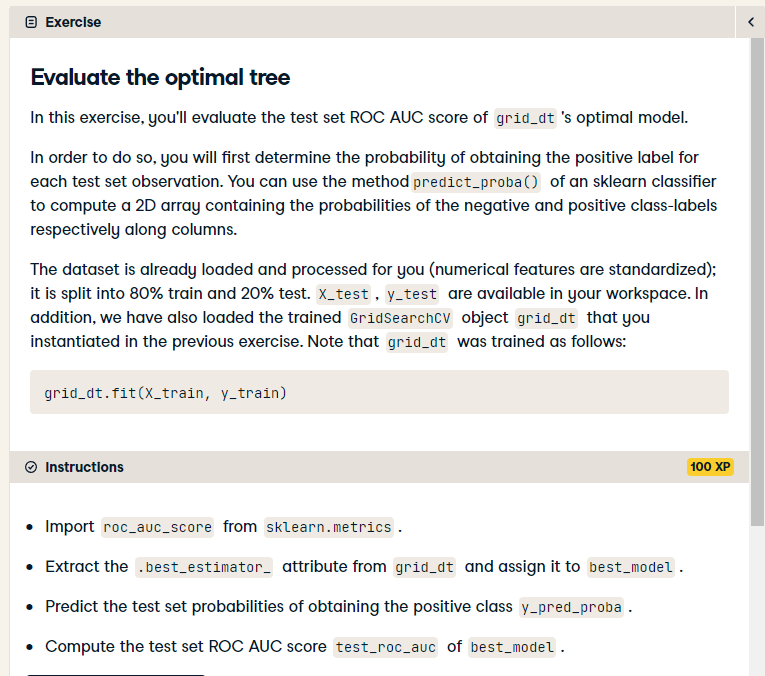

In [61]:
# Import roc_auc_score from sklearn.metrics
from sklearn.metrics import roc_auc_score

# Extract the best estimator
best_model = grid_dt.best_estimator_
print('Best estimator:\n', best_model)

# Predict the test set probabilities of the positive class
y_pred_proba = best_model.predict_proba(X_test)[:,1]

# Compute test_roc_auc
test_roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print test_roc_auc
print('Test set ROC AUC score: {:.3f}'.format(test_roc_auc))

Best estimator:
 DecisionTreeClassifier(max_depth=3, min_samples_leaf=0.14, random_state=1)
Test set ROC AUC score: 0.731


### Tuning an RF's Hyperparameters
#### Random Forests Hyperparameters
- CART hyperparameters
- number of estimators
- bootstrap
#### Tuning is expensive
- Hyperparameter tuning:
    - computationally expensive,
    - sometimes leads to very slight improvement,
- Weight the impact of tuning on the whole project

#### Doing:
- Instantiate RF
- Instantiate GridsearchCV
- Evaluating the test set RMSE of the best model
- 

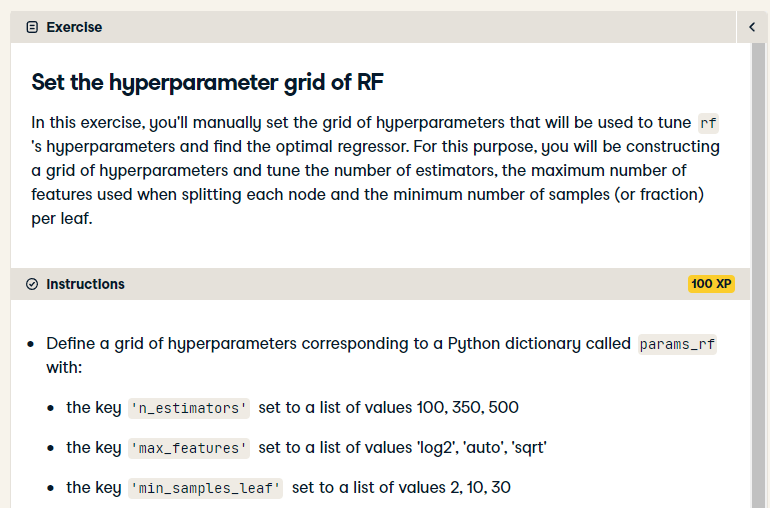

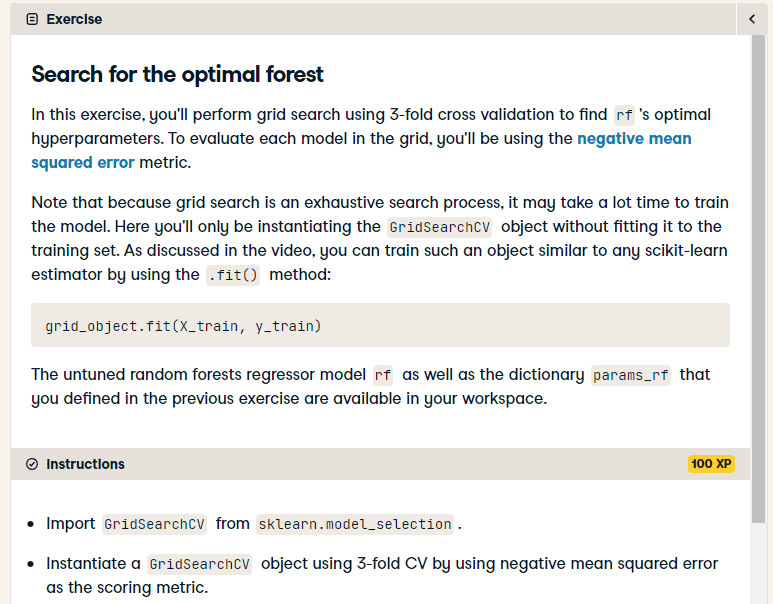

In [62]:
rf = RandomForestRegressor()


In [63]:
# Define the dictionary 'params_rf'
params_rf = {
   'max_features': ['log2', 'auto', 'sqrt'],
 'min_samples_leaf': [2, 10, 30],
 'n_estimators': [100, 350, 500],
 }

# Import GridSearchCV
from sklearn.model_selection import GridSearchCV
# Instantiate grid_rf
grid_rf = GridSearchCV(estimator=rf,
                       param_grid=params_rf,
                       scoring='neg_mean_squared_error',
                       cv=3,
                       verbose=1,
                       n_jobs=-1)
bike = pd.read_csv('bikes.csv')
X = bike[['hr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'instant',
       'mnth', 'yr', 'Clear to partly cloudy', 'Light Precipitation', 'Misty']]
y = bike['cnt']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)
grid_rf.fit(X_train, y_train)

# Fit with train set
grid_rf.fit(X_train, y_train)


Fitting 3 folds for each of 27 candidates, totalling 81 fits
Fitting 3 folds for each of 27 candidates, totalling 81 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_features': ['log2', 'auto', 'sqrt'],
                         'min_samples_leaf': [2, 10, 30],
                         'n_estimators': [100, 350, 500]},
             scoring='neg_mean_squared_error', verbose=1)

In [65]:
# Import mean_squared_error from sklearn.metrics as MSE 
from sklearn.metrics import mean_squared_error as MSE

# Extract the best estimator
best_model = grid_rf.best_estimator_

# Predict test set labels
y_pred = best_model.predict(X_test)

# Compute rmse_test
rmse_test = MSE(y_test, y_pred)**(1/2)

# Print rmse_test
print('Test RMSE of best model: {:.3f}'.format(rmse_test)) 

Test RMSE of best model: 51.465
